In [2]:
import numpy as np
import matplotlib.pyplot as plt
import psycopg2 as psy
import geopandas as gpd
import pysal 

In [3]:
%matplotlib inline
raptors = gpd.read_file("geopandas/data/Raptor_Nests.shp")
raptors.head(10)

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)
5,4.0,40.217638,-104.779386,2011-01-06,Red-tail Hawk,FLEDGED NEST,4,POINT (-104.79963 40.15712)
6,5.0,40.271203,-104.740819,2011-01-06,Swainsons Hawk,INACTIVE NEST,5,POINT (-104.66790 40.26382)
7,6.0,40.357587,-104.737632,2011-01-06,Swainsons Hawk,ACTIVE NEST,6,POINT (-104.67679 40.30686)
8,7.0,40.359660,-104.730698,2011-01-06,Swainsons Hawk,FLEDGED NEST,7,POINT (-104.69146 40.31360)
9,8.0,40.358919,-104.725179,2011-01-06,Red-tail Hawk,INACTIVE NEST,8,POINT (-104.67825 40.41094)


<Axes: >

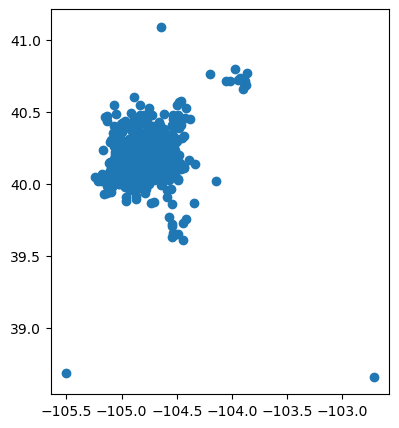

In [4]:
raptors.plot(figsize=(5,5))